## **Vehicle accident predication model based on weather factors**


**Libraries**

In [1]:
#importing numpy and pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Import Dataset**

In [2]:
first_dataset=pd.read_csv("Train_WeatherData1.csv")


In [5]:
first_dataset.shape

(162566, 8)

In [3]:
second_dataset=pd.read_csv("Train_Vehicletravellingdata1.csv")

In [4]:
second_dataset.shape

(162566, 10)

In [6]:
df=pd.concat([first_dataset, second_dataset],axis=1)
df.head()

,ID,weather_intensity,intensity,humidity,wind_direc,wind_speed,light_condition,percep_type,ID,DateTime,speed,ID_prec,speed_prec,weight,leng_prec,time_gaprec,condition_of_road,lane_road_accident
0,DR_24526,7.0,None,95.0,146.0,1.0,daylight,clear,DR_24526,21-03-2012 09:14,81,57227,87,16986,941,94.0,Dry,1
1,DR_24526,7.0,None,95.0,124.0,0.0,daylight,clear,DR_24526,21-03-2012 09:15,88,57229,81,1708,551,11.0,Dry,1
2,DR_24526,7.0,None,95.0,124.0,0.0,daylight,clear,DR_24526,21-03-2012 09:15,88,57230,88,22892,1698,4.0,Dry,1
3,DR_24526,7.0,None,95.0,124.0,0.0,daylight,clear,DR_24526,21-03-2012 09:15,84,57228,89,1945,544,127.0,Dry,0
4,DR_24526,7.0,None,95.0,124.0,0.0,daylight,clear,DR_24526,21-03-2012 09:15,89,57231,88,13787,1893,42.0,Dry,1


In [7]:
df.to_csv('project2.csv')

In [8]:
df5=pd.read_csv("project2.csv",index_col=0,na_values=' ')
df5.head()

,ID,weather_intensity,intensity,humidity,wind_direc,wind_speed,light_condition,percep_type,ID.1,DateTime,speed,ID_prec,speed_prec,weight,leng_prec,time_gaprec,condition_of_road,lane_road_accident
0,DR_24526,7.0,None,95.0,146.0,1.0,daylight,clear,DR_24526,21-03-2012 09:14,81,57227,87,16986,941,94.0,Dry,1
1,DR_24526,7.0,None,95.0,124.0,0.0,daylight,clear,DR_24526,21-03-2012 09:15,88,57229,81,1708,551,11.0,Dry,1
2,DR_24526,7.0,None,95.0,124.0,0.0,daylight,clear,DR_24526,21-03-2012 09:15,88,57230,88,22892,1698,4.0,Dry,1
3,DR_24526,7.0,None,95.0,124.0,0.0,daylight,clear,DR_24526,21-03-2012 09:15,84,57228,89,1945,544,127.0,Dry,0
4,DR_24526,7.0,None,95.0,124.0,0.0,daylight,clear,DR_24526,21-03-2012 09:15,89,57231,88,13787,1893,42.0,Dry,1


shape of dataset 


In [9]:
df5.shape

(162566, 18)

## Datatype of dataset

In [10]:
df5.dtypes

ID                     object
weather_intensity     float64
intensity              object
humidity              float64
wind_direc            float64
wind_speed            float64
light_condition        object
percep_type            object
ID.1                   object
DateTime               object
speed                   int64
ID_prec                 int64
speed_prec              int64
weight                  int64
leng_prec               int64
time_gaprec           float64
condition_of_road      object
lane_road_accident      int64
dtype: object

Convert datatype of "DateTime" cloumn string object into datetime object

In [11]:
df5["DateTime"]= pd.to_datetime(df5["DateTime"]) 

In [12]:
df5.dtypes

ID                            object
weather_intensity            float64
intensity                     object
humidity                     float64
wind_direc                   float64
wind_speed                   float64
light_condition               object
percep_type                   object
ID.1                          object
DateTime              datetime64[ns]
speed                          int64
ID_prec                        int64
speed_prec                     int64
weight                         int64
leng_prec                      int64
time_gaprec                  float64
condition_of_road             object
lane_road_accident             int64
dtype: object

**Check isNull value is present**

In [13]:
df5.isnull().sum()

ID                       0
weather_intensity     2057
intensity             2274
humidity              2105
wind_direc            2114
wind_speed            2464
light_condition          0
percep_type              0
ID.1                     0
DateTime                 0
speed                    0
ID_prec                  0
speed_prec               0
weight                   0
leng_prec                0
time_gaprec           2455
condition_of_road        0
lane_road_accident       0
dtype: int64

**Replace all Null values with mode**

In [14]:
def fill_with_mode(x):
  for col in x:
    df5[col].fillna(df5[col].mode()[0],inplace=True)
col=['time_gaprec','weather_intensity','humidity','wind_direc','wind_speed']
fill_with_mode(col)

After Replacing all Null values checking is there Null values still present

In [15]:
df5.isnull().sum(axis=0)

ID                       0
weather_intensity        0
intensity             2274
humidity                 0
wind_direc               0
wind_speed               0
light_condition          0
percep_type              0
ID.1                     0
DateTime                 0
speed                    0
ID_prec                  0
speed_prec               0
weight                   0
leng_prec                0
time_gaprec              0
condition_of_road        0
lane_road_accident       0
dtype: int64

**Label mapping**

In [16]:
df5['intensity'].unique()

array(['None', 'Low', nan, 'Moderate', 'High'], dtype=object)

In [17]:
label_map = {'intensity' : {'None' : 1, 'Low' : 2 , 'Moderate' : 3,'High' : 4}}
df5= df5.replace(label_map)

In [18]:
df5['intensity'].unique()

array([ 1.,  2., nan,  3.,  4.])

Fill Null value  with mode

In [19]:
def fill_with_mode(x):
  for col in x:
    df5[col].fillna(df5[col].mode()[0],inplace=True)
col=['intensity']
fill_with_mode(col)

In [20]:
df5['intensity'].unique()

array([1., 2., 3., 4.])

In [21]:
df5.isna().sum()

ID                    0
weather_intensity     0
intensity             0
humidity              0
wind_direc            0
wind_speed            0
light_condition       0
percep_type           0
ID.1                  0
DateTime              0
speed                 0
ID_prec               0
speed_prec            0
weight                0
leng_prec             0
time_gaprec           0
condition_of_road     0
lane_road_accident    0
dtype: int64

In [ ]:
df5.shape

(162566, 18)

**drop columns**

In [22]:
df5.drop(['ID','ID.1','DateTime','ID_prec'],axis=1,inplace=True)

In [23]:
df5.dtypes


weather_intensity     float64
intensity             float64
humidity              float64
wind_direc            float64
wind_speed            float64
light_condition        object
percep_type            object
speed                   int64
speed_prec              int64
weight                  int64
leng_prec               int64
time_gaprec           float64
condition_of_road      object
lane_road_accident      int64
dtype: object

# **Visualization**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'lane_road_accident by condition_of_road')

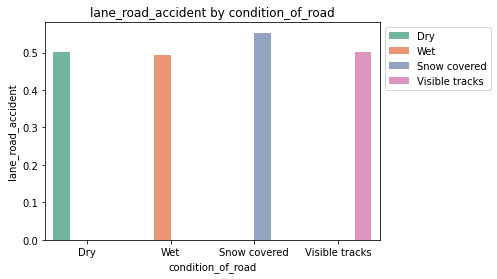

In [ ]:
import seaborn as sns
plt.figure(figsize=(6,4))
sns.barplot('condition_of_road','lane_road_accident',hue='condition_of_road',data=df5,ci=None, palette='Set2')
plt.legend(bbox_to_anchor=(1,1))
plt.title('lane_road_accident by condition_of_road')

**The above graph is the 'condition_of_road' with repsect to 'road_accident'.**
**By considering 'Snow_covered' condition the chances of accident is high as compared others.**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'percep_type by lane_road_accident')

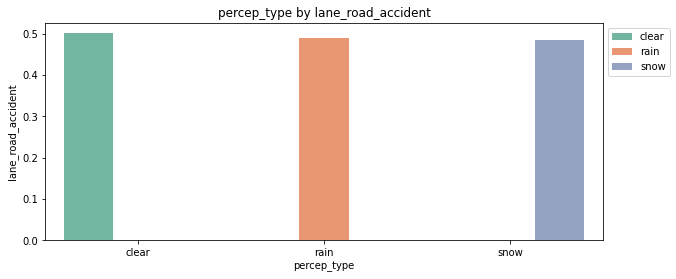

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,4))
sns.barplot('percep_type','lane_road_accident',hue='percep_type',data=df5,ci=None, palette='Set2')
plt.legend(bbox_to_anchor=(1,1))
plt.title('percep_type by lane_road_accident')

**Observing above graph it is state that during percep_type weather i.e when Weather is clear the chances of getting accident is high as compared others and in 'snow','Rain' condition chances is low**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Intensity by lane_road_accident')

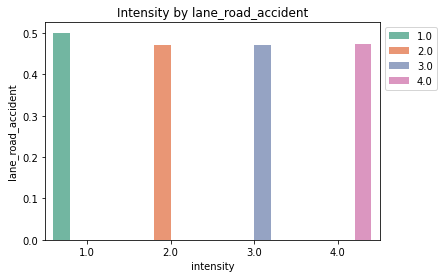

In [ ]:
import seaborn as sns
plt.figure(figsize=(6,4))
sns.barplot('intensity','lane_road_accident',hue='intensity',data=df5,ci=None, palette='Set2')
plt.legend(bbox_to_anchor=(1,1))
plt.title('Intensity by lane_road_accident')

**By observing above graph the chances of getting accident due to weather intensity 'None' (i.e when there is no intensity is present)is high as comparing other condition**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'lane_road_accident by light_condition')

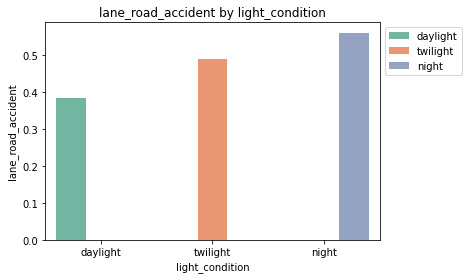

In [ ]:
import seaborn as sns
plt.figure(figsize=(6,4))
sns.barplot('light_condition','lane_road_accident',hue='light_condition',data=df5,ci=None, palette='Set2')
plt.legend(bbox_to_anchor=(1,1))
plt.title('lane_road_accident by light_condition')

**The above graph is light_condition vs road_accident.By observing the chances of getting accident is high during night and in daylight there is low chances of getting accident**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


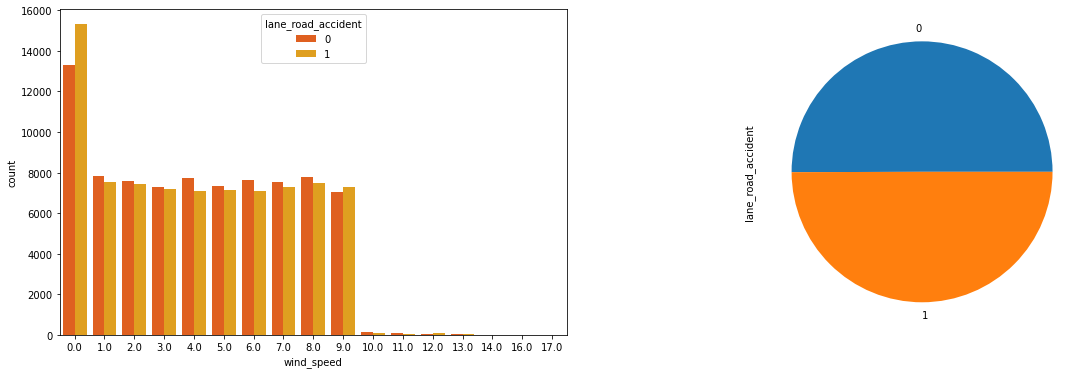

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(20,6))
sns.countplot('wind_speed',data=df5,hue='lane_road_accident',palette='autumn',ax=ax.flat[0])
(df5['lane_road_accident'].value_counts(normalize=True)*100).plot(kind='pie',ax=ax.flat[1])
plt.show()

**Label Encoder**

In [24]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
var = ['light_condition','percep_type','condition_of_road']
for item in var:
  df5[item] = lb.fit_transform(df5[item])

check duplicates value is present or not?


In [25]:
df5.drop_duplicates().shape

(162566, 14)

**Histogram Plotting**

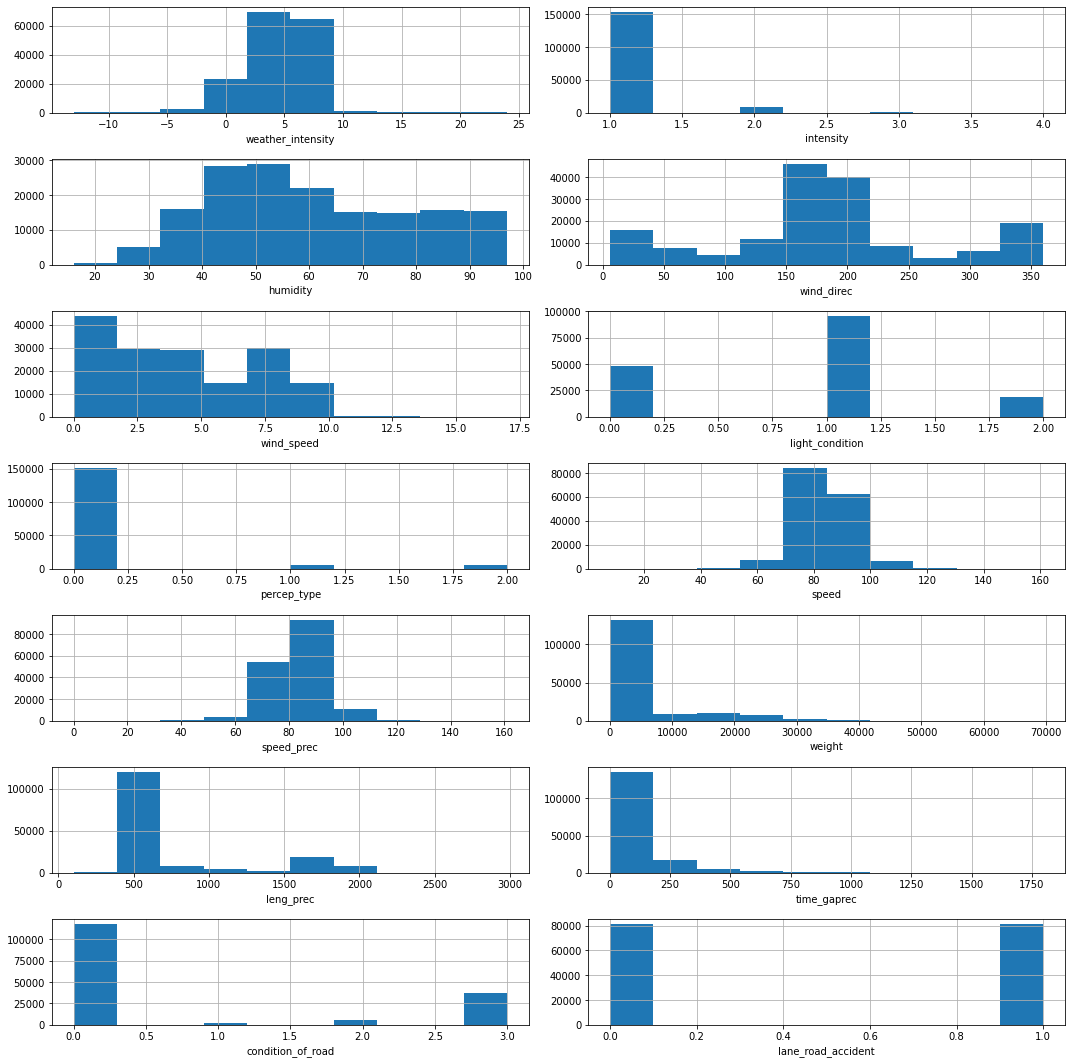

In [ ]:
plt.figure(figsize=(15,25))

for i, col in enumerate(df5.columns,1):
    plt.subplot(12,2, i)
    df5[col].hist()
    plt.xlabel(col)
plt.tight_layout()

In [ ]:
df5.head()

,weather_intensity,intensity,humidity,wind_direc,wind_speed,light_condition,percep_type,speed,speed_prec,weight,leng_prec,time_gaprec,condition_of_road,lane_road_accident
0,7.0,1.0,95.0,146.0,1.0,0,0,81,87,16986,941,94.0,0,1
1,7.0,1.0,95.0,124.0,0.0,0,0,88,81,1708,551,11.0,0,1
2,7.0,1.0,95.0,124.0,0.0,0,0,88,88,22892,1698,4.0,0,1
3,7.0,1.0,95.0,124.0,0.0,0,0,84,89,1945,544,127.0,0,0
4,7.0,1.0,95.0,124.0,0.0,0,0,89,88,13787,1893,42.0,0,1


In [ ]:
df5.shape

(162566, 14)

In [26]:
df5.describe()

,weather_intensity,intensity,humidity,wind_direc,wind_speed,light_condition,percep_type,speed,speed_prec,weight,leng_prec,time_gaprec,condition_of_road,lane_road_accident
count,162566.000000,162566.000000,162566.000000,162566.000000,162566.000000,162566.000000,162566.000000,162566.000000,162566.000000,162566.000000,162566.000000,162566.000000,162566.000000,162566.000000
mean,4.607999,1.057724,60.457845,182.429173,4.125161,0.819070,0.106117,83.455483,83.458817,5017.562793,790.775285,103.764656,0.773169,0.499563
std,3.232133,0.252619,18.229576,88.348203,3.047835,0.614165,0.409859,9.375122,9.373120,7399.315434,481.944297,176.318944,1.277600,0.500001
min,-13.000000,1.000000,16.000000,6.000000,0.000000,0.000000,0.000000,8.000000,0.000000,3.000000,102.000000,1.000000,0.000000,0.000000
25%,2.000000,1.000000,46.000000,152.000000,1.000000,0.000000,0.000000,78.000000,78.000000,1502.000000,527.000000,6.000000,0.000000,0.000000
50%,5.000000,1.000000,57.000000,180.000000,4.000000,1.000000,0.000000,83.000000,83.000000,1862.000000,560.000000,42.000000,0.000000,0.000000
75%,7.000000,1.000000,76.000000,208.000000,7.000000,1.000000,0.000000,88.000000,88.000000,2669.000000,701.000000,123.000000,2.000000,1.000000
max,24.000000,4.000000,97.000000,360.000000,17.000000,2.000000,2.000000,161.000000,161.000000,69548.000000,2981.000000,1797.000000,3.000000,1.000000


**Box Plot**

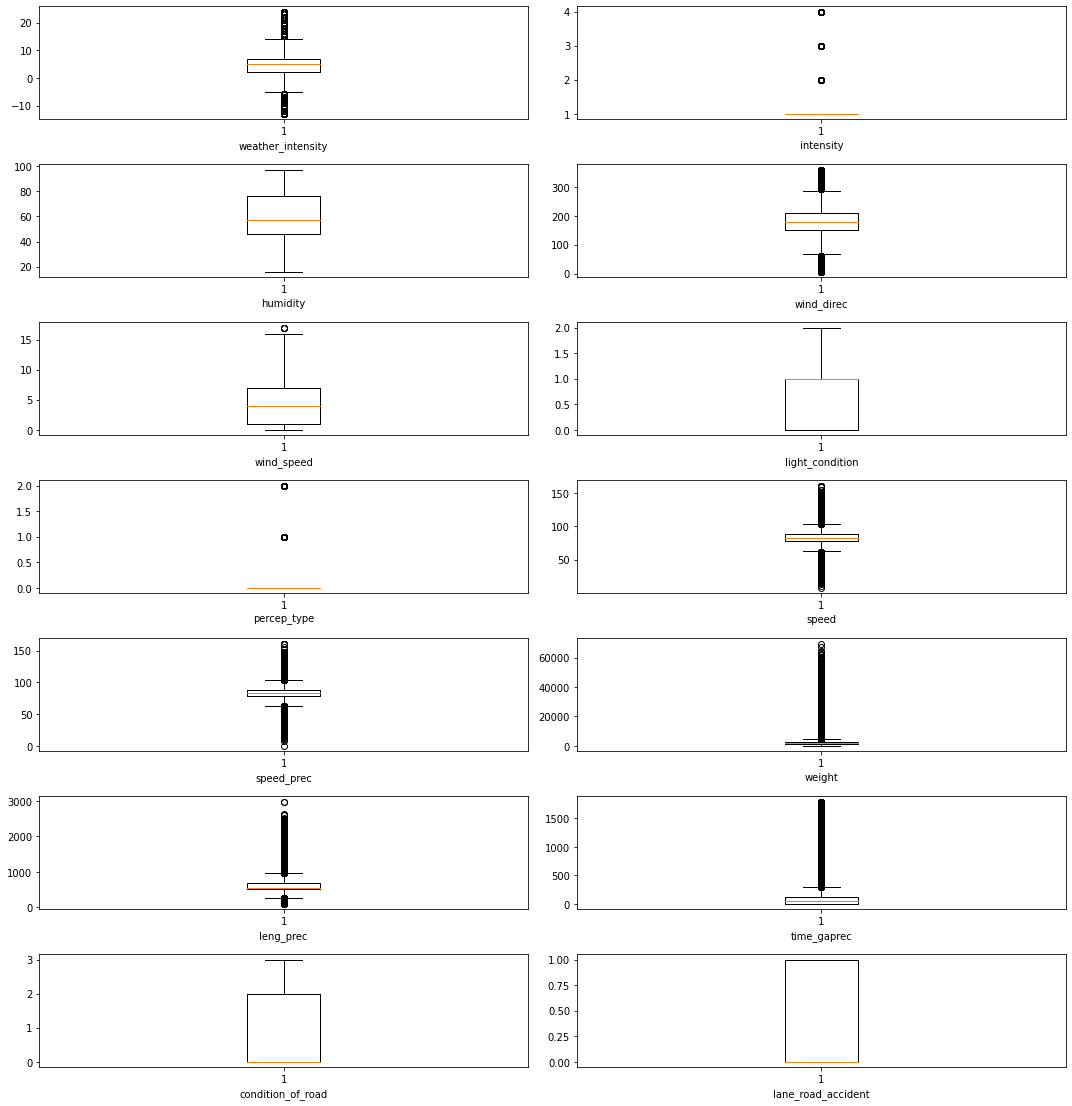

In [ ]:
plt.figure(figsize=(15,26))

for i, col in enumerate(df5.columns,1):
    plt.subplot(12,2, i)
    plt.boxplot(df5[col])
    plt.xlabel(col)
plt.tight_layout()

boxplot of individual features 'weight' 

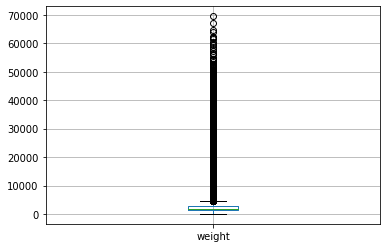

In [ ]:
df5[['weight']].boxplot()

In [ ]:
df5['weight'].describe()

count    162566.000000
mean       5017.562793
std        7399.315434
min           3.000000
25%        1502.000000
50%        1862.000000
75%        2669.000000
max       69548.000000
Name: weight, dtype: float64

In [ ]:
#df5['weight']= np.log(df5['weight'])

In [ ]:
df5['weight'].describe()

count    162566.000000
mean       5017.562793
std        7399.315434
min           3.000000
25%        1502.000000
50%        1862.000000
75%        2669.000000
max       69548.000000
Name: weight, dtype: float64

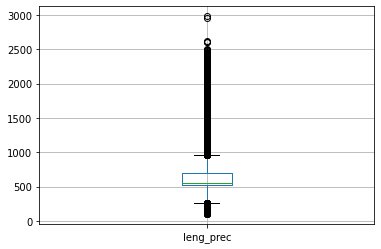

In [ ]:
df5[['leng_prec']].boxplot()

In [ ]:
df5['leng_prec'].describe()

count    162566.000000
mean        790.775285
std         481.944297
min         102.000000
25%         527.000000
50%         560.000000
75%         701.000000
max        2981.000000
Name: leng_prec, dtype: float64

In [ ]:
#df5['leng_prec']= np.log(df5['leng_prec'])

In [ ]:
df5['leng_prec'].describe()

count    162566.000000
mean        790.775285
std         481.944297
min         102.000000
25%         527.000000
50%         560.000000
75%         701.000000
max        2981.000000
Name: leng_prec, dtype: float64

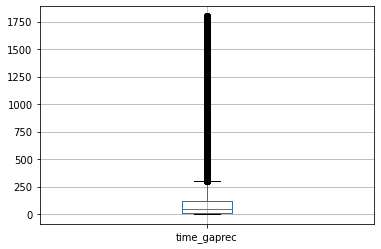

In [ ]:
df5[['time_gaprec']].boxplot()

In [ ]:
df5['time_gaprec'].describe()

count    162566.000000
mean        103.764656
std         176.318944
min           1.000000
25%           6.000000
50%          42.000000
75%         123.000000
max        1797.000000
Name: time_gaprec, dtype: float64

In [ ]:
#df5['time_gaprec']= np.log(df5['time_gaprec'])

In [ ]:
df5['time_gaprec'].describe()

count    162566.000000
mean        103.764656
std         176.318944
min           1.000000
25%           6.000000
50%          42.000000
75%         123.000000
max        1797.000000
Name: time_gaprec, dtype: float64

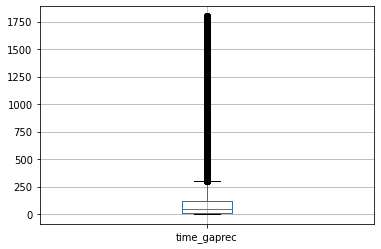

In [ ]:
df5[['time_gaprec']].boxplot()

In [27]:
df5.columns

Index(['weather_intensity', 'intensity', 'humidity', 'wind_direc',
       'wind_speed', 'light_condition', 'percep_type', 'speed', 'speed_prec',
       'weight', 'leng_prec', 'time_gaprec', 'condition_of_road',
       'lane_road_accident'],
      dtype='object')

**Normalization**

In [28]:
#normalization

def normalize(x):
  return (x-np.min(x))/(max(x)-min(x))

df5=df5.apply(normalize)

In [29]:
df5.describe()

,weather_intensity,intensity,humidity,wind_direc,wind_speed,light_condition,percep_type,speed,speed_prec,weight,leng_prec,time_gaprec,condition_of_road,lane_road_accident
count,162566.000000,162566.000000,162566.000000,162566.000000,162566.000000,162566.000000,162566.000000,162566.000000,162566.000000,162566.000000,162566.000000,162566.000000,162566.000000,162566.000000
mean,0.475892,0.019241,0.548862,0.498387,0.242657,0.409535,0.053058,0.493173,0.518378,0.072105,0.239241,0.057219,0.257723,0.499563
std,0.087355,0.084206,0.225056,0.249571,0.179284,0.307083,0.204929,0.061275,0.058218,0.106396,0.167400,0.098173,0.425867,0.500001
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.405405,0.000000,0.370370,0.412429,0.058824,0.000000,0.000000,0.457516,0.484472,0.021554,0.147621,0.002784,0.000000,0.000000
50%,0.486486,0.000000,0.506173,0.491525,0.235294,0.500000,0.000000,0.490196,0.515528,0.026731,0.159083,0.022829,0.000000,0.000000
75%,0.540541,0.000000,0.740741,0.570621,0.411765,0.500000,0.000000,0.522876,0.546584,0.038335,0.208058,0.067929,0.666667,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Split Train Test Dataset**

Considering road_accident Feature for predication

In [30]:
Y = df5['lane_road_accident']
X = df5.drop('lane_road_accident', axis = 1)

In [31]:
X

,weather_intensity,intensity,humidity,wind_direc,wind_speed,light_condition,percep_type,speed,speed_prec,weight,leng_prec,time_gaprec,condition_of_road
0,0.540541,0.000000,0.975309,0.395480,0.058824,0.0,0.0,0.477124,0.540373,0.244202,0.291421,0.051782,0.0
1,0.540541,0.000000,0.975309,0.333333,0.000000,0.0,0.0,0.522876,0.503106,0.024517,0.155957,0.005568,0.0
2,0.540541,0.000000,0.975309,0.333333,0.000000,0.0,0.0,0.522876,0.546584,0.329125,0.554359,0.001670,0.0
3,0.540541,0.000000,0.975309,0.333333,0.000000,0.0,0.0,0.496732,0.552795,0.027924,0.153526,0.070156,0.0
4,0.540541,0.000000,0.975309,0.333333,0.000000,0.0,0.0,0.529412,0.546584,0.198203,0.622091,0.022829,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
162561,0.486486,0.333333,0.901235,0.968927,0.176471,0.5,0.5,0.522876,0.540373,0.209562,0.333796,0.001114,0.0
162562,0.594595,0.333333,0.925926,0.110169,0.470588,0.5,0.5,0.392157,0.515528,0.154217,0.623133,0.068486,0.0
162563,0.594595,0.333333,0.925926,0.110169,0.470588,0.5,0.5,0.424837,0.546584,0.029377,0.163251,0.021158,0.0
162564,0.594595,0.666667,0.925926,0.110169,0.470588,0.5,1.0,0.398693,0.422360,0.046603,0.211184,0.000000,0.0


In [32]:
from sklearn.model_selection import train_test_split

In [33]:

x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size  = 0.25, random_state =7)

In [34]:
x_train.shape,x_test.shape

((121924, 13), (40642, 13))

**Correlation of x_train**

**heatmap**

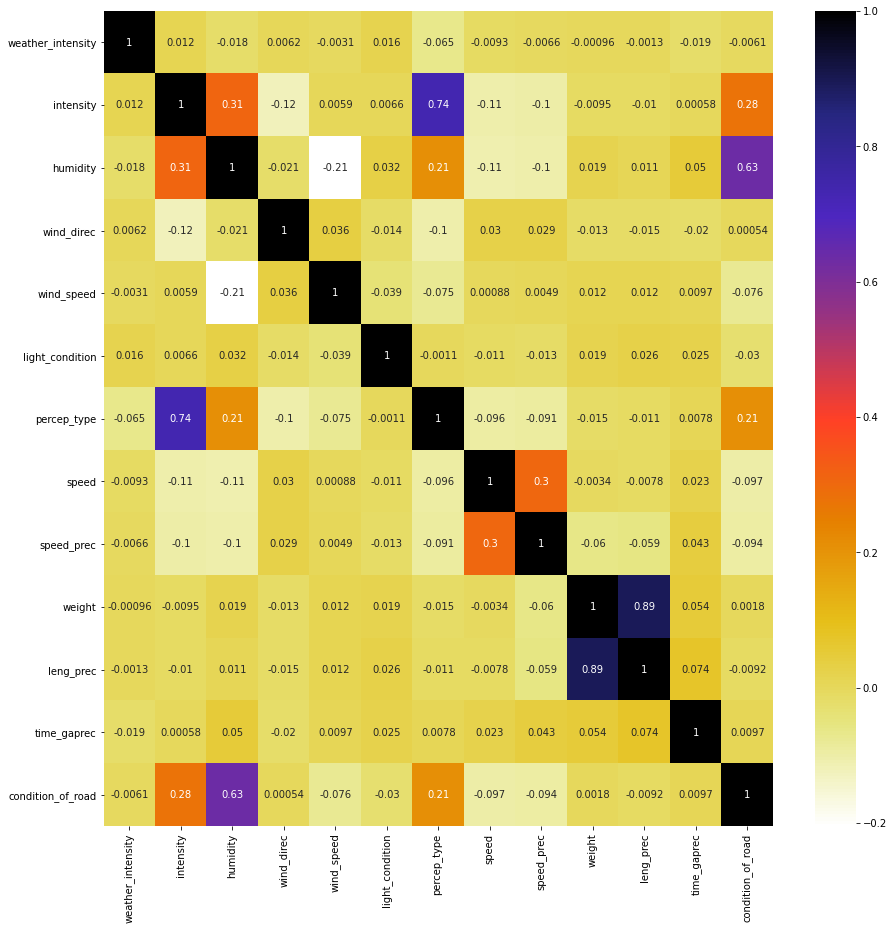

In [35]:
import seaborn as sns
plt.figure(figsize=(15,15))
cor=x_train.corr()
sns.heatmap(cor, annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
def corr(x,threshold):
  col_corr=set()
  corr_matrix=x.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if (corr_matrix.iloc[i,j]) >threshold:
        colname=corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr



In [ ]:
corr_features=corr(x_train,0.7)
len(set((corr_features)))

2

In [ ]:
corr_features

{'leng_prec', 'percep_type'}

In [ ]:
x_train.shape,x_test.shape

((121924, 13), (40642, 13))

**Applying Algorithms**

**Logistic Regression**

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
log_model = LogisticRegression()
#fit the model
log_model.fit(x_train, y_train)
y_t1=log_model.predict(x_test)
y_t2=log_model.predict(x_train)
#evaluate model
score=accuracy_score(y_test,y_t1)
score1=accuracy_score(y_train,y_t2)
print(score)
print(score1)

0.6340485212341912
0.6348791050162397


**ROC CURVE**

In [ ]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, y_t1, pos_label=1)
#fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

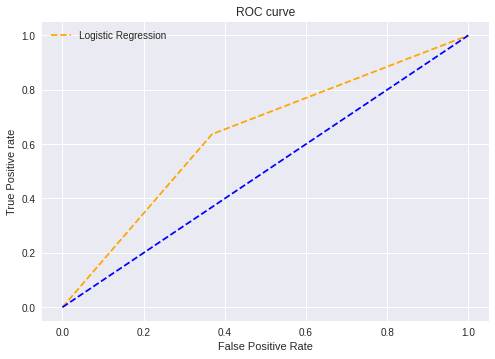

In [ ]:
import matplotlib.pyplot as plt


# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show();

**After Tunning**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

solvers=['newton-cg','lbfgs','liblinear']
penalty=['l2']
c_values=[100,10,1.0,0.1,0.01,1000]
grid=dict(solver=solvers,penalty=penalty,C=c_values)
model_params={
    'logistic':{
        'model':LogisticRegression(),
        'params':grid
    }
    
}

scores=[]

for model_name,mp in model_params.items():
  clf1=GridSearchCV(mp['model'],mp['params'],cv=10,return_train_score=False)
  clf1.fit(x_test,y_test)
  scores.append({
      'model':model_name,
      'best_score':clf1.best_score_,
      'best_params':clf1.best_params_
  })
logistic_df=pd.DataFrame(scores,columns=['model','best_score','best_params'])
logistic_df


,model,best_score,best_params
0,logistic,0.634737,"{'C': 1000, 'penalty': 'l2', 'solver': 'newton..."


Accuracy2=63.47%

# Ridge Classifier

In [ ]:
from sklearn.linear_model import RidgeClassifier
rc = RidgeClassifier(alpha=1, normalize=True)
rc.fit(x_train, y_train)
rc_pred = rc.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
import sklearn.metrics as metrics
print(confusion_matrix(y_test,rc_pred))
print(metrics.accuracy_score(y_test,rc_pred))
print(metrics.recall_score(y_test,rc_pred))
print(metrics.precision_score(y_test,rc_pred))
print(metrics.f1_score(y_test,rc_pred))

[[12905  7520]
 [ 7322 12895]]
0.6348112789724916
0.637829549389128
0.6316433994611805
0.6347214018507581


In [ ]:
from sklearn.linear_model import RidgeClassifier
rc = RidgeClassifier(alpha=1,normalize=True)
rc.fit(x_train, y_train)

RidgeClassifier(alpha=1, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=True, random_state=None, solver='auto',
                tol=0.001)

In [ ]:
param_rc={
    
    'max_iter':range(5,20),
    'alpha':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.5],
    'normalize':[True,False],
    #'tol':[1e-2,1e-4,1e-6,1e-8,1e-10]
    'solver':['svd','sparse_cg']

    
    }
rc_grid=GridSearchCV(estimator=rc,param_grid=param_rc,cv=5,verbose=1)
rc_grid.fit(x_train,y_train)

Fitting 5 folds for each of 660 candidates, totalling 3300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 3300 out of 3300 | elapsed:  6.9min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RidgeClassifier(alpha=1, class_weight=None, copy_X=True,
                                       fit_intercept=True, max_iter=None,
                                       normalize=True, random_state=None,
                                       solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                   1.0, 1.5],
                         'max_iter': range(5, 20), 'normalize': [True, False],
                         'solver': ['svd', 'sparse_cg']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [ ]:
from sklearn.linear_model import RidgeClassifier
rct = RidgeClassifier(alpha=1,max_iter=20,solver='sparse_cg',random_state=9)
rct.fit(x_train, y_train)
rct_pred = rct.predict(x_test)
print(confusion_matrix(y_test,rct_pred))
print(metrics.accuracy_score(y_test,rct_pred))
print(metrics.recall_score(y_test,rct_pred))
print(metrics.precision_score(y_test,rct_pred))
print(metrics.f1_score(y_test,rct_pred))

[[12902  7523]
 [ 7365 12852]]
0.6336794449092072
0.6357026265024485
0.6307730061349693
0.6332282223098148


# **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_default=DecisionTreeClassifier(criterion='entropy',random_state=3)
dt_default.fit(x_train,y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=3, splitter='best')

In [ ]:
dt_default_pred=dt_default.predict(x_test)

In [ ]:
confusion_matrix(y_test,dt_default_pred)

array([[12542,  7883],
       [ 7856, 12361]])

In [ ]:
metrics.accuracy_score(y_test,dt_default_pred)

0.6127405147384479

Hyper tunning

In [ ]:
from sklearn.tree import DecisionTreeClassifier


# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": range(10,25,5),
              "min_samples_split": range(50,200,25),
              "min_samples_leaf": range(50,200,25),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
dtree = DecisionTreeClassifier(random_state=7)


dtree_cv = GridSearchCV(dtree, param_dist, cv=5,verbose=1
                        ,return_train_score=True)

# Fit it to the data
dtree_cv.fit(x_train,y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1080 out of 1080 | elapsed: 11.4min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=7, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 25, 5),
            

In [ ]:
dtree_scores=pd.DataFrame(dtree_cv.cv_results_)
dtree_scores

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.551985,0.008219,0.007840,0.000082,gini,10,50,50,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.669879,0.676769,0.671560,0.669100,0.676099,0.672681,0.003172,171,0.701401,0.696839,0.698746,0.699382,0.696883,0.698650,0.001704
1,0.550676,0.011935,0.008492,0.000588,gini,10,50,75,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.669879,0.676769,0.671560,0.669100,0.676099,0.672681,0.003172,171,0.701401,0.696839,0.698746,0.699382,0.696883,0.698650,0.001704
2,0.546195,0.004315,0.007884,0.000044,gini,10,50,100,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.669879,0.676769,0.671560,0.669100,0.676099,0.672681,0.003172,171,0.701401,0.696839,0.698746,0.699382,0.696883,0.698650,0.001704
3,0.542918,0.006077,0.008297,0.000805,gini,10,50,125,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.669141,0.676399,0.671068,0.669592,0.675812,0.672403,0.003096,181,0.700397,0.696439,0.697926,0.698572,0.696463,0.697959,0.001474
4,0.536171,0.004428,0.007973,0.000280,gini,10,50,150,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.668649,0.677958,0.671601,0.670002,0.676140,0.672870,0.003584,169,0.699515,0.695230,0.697516,0.697916,0.695592,0.697154,0.001577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,0.584985,0.006817,0.007952,0.000113,entropy,20,175,75,"{'criterion': 'entropy', 'max_depth': 20, 'min...",0.668731,0.679188,0.674431,0.673078,0.677247,0.674535,0.003601,55,0.690360,0.692123,0.690001,0.690421,0.690814,0.690744,0.000736
212,0.585684,0.004604,0.007925,0.000057,entropy,20,175,100,"{'criterion': 'entropy', 'max_depth': 20, 'min...",0.668731,0.679188,0.674431,0.673078,0.677247,0.674535,0.003601,55,0.690360,0.692123,0.690001,0.690421,0.690814,0.690744,0.000736
213,0.588389,0.005942,0.007933,0.000040,entropy,20,175,125,"{'criterion': 'entropy', 'max_depth': 20, 'min...",0.668731,0.679188,0.674431,0.673078,0.677247,0.674535,0.003601,55,0.690360,0.692123,0.690001,0.690421,0.690814,0.690744,0.000736
214,0.583445,0.005191,0.008009,0.000097,entropy,20,175,150,"{'criterion': 'entropy', 'max_depth': 20, 'min...",0.668731,0.679188,0.674431,0.673078,0.677247,0.674535,0.003601,55,0.690360,0.692123,0.690001,0.690421,0.690814,0.690744,0.000736


In [ ]:
print("best_accuracy",dtree_cv.best_score_)
print(dtree_cv.best_estimator_)
print(dtree_cv.best_params_)

best_accuracy 0.675691427085301
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=20, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=125, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=7, splitter='best')
{'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 125, 'min_samples_split': 50}


In [ ]:
dtree_tn=DecisionTreeClassifier(criterion='entropy',
                                random_state=7,
                                max_depth=25,#15
                                min_samples_leaf=125,#95
                                min_samples_split=60)#50

dtree_tn.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=25, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=125, min_samples_split=60,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=7, splitter='best')

In [ ]:
dtree_tn.score(x_test,y_test)

0.6723586437675311


accuracy  is 67.23%

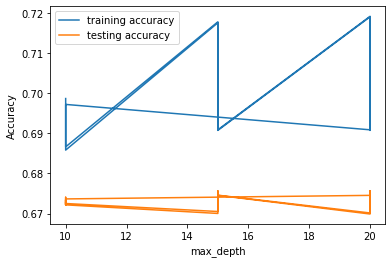

In [ ]:
plt.figure()
plt.plot(dtree_scores["param_max_depth"],
         dtree_scores["mean_train_score"],
         label="training accuracy")

plt.plot(dtree_scores["param_max_depth"],
         dtree_scores["mean_test_score"],
         label="testing accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# **RANDOM FOREST**

In [43]:
from sklearn.model_selection import GridSearchCV

In [36]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=1,criterion='entropy',random_state=7)
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1,
                       n_jobs=None, oob_score=False, random_state=7, verbose=0,
                       warm_start=False)

In [39]:
rfc_pred=rfc.predict(x_test)

In [ ]:
print(confusion_matrix(y_test,rfc_pred))
print(metrics.accuracy_score(y_test,rfc_pred))

[[12418  8007]
 [ 7962 12255]]
0.6070813444220264


Hyperparamter Tunning

In [40]:
param_grid = { 
    'n_estimators': range(25,100,25),
    'max_depth' : range(1,25,5),
    'criterion' :['gini','entropy']
}

In [44]:
CV_rfc = GridSearchCV(estimator=rfc,param_grid=param_grid,cv=5, verbose=1)

In [45]:
CV_rfc.fit(x_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed: 16.9min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='entropy',
                                              max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=1, n_jobs=None,
                                              oob_score=False, rand

In [ ]:
print(CV_rfc.best_estimator_)
print(CV_rfc.best_score_)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=16, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=75,
                       n_jobs=None, oob_score=False, random_state=7, verbose=0,
                       warm_start=False)
0.702175131596863


In [46]:
rfc_t=RandomForestClassifier(criterion='entropy',
                                random_state=7,
                                max_depth=21,
                             n_estimators=75)
rfc_t.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=21, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=75,
                       n_jobs=None, oob_score=False, random_state=7, verbose=0,
                       warm_start=False)

In [47]:
y_pred_rfc=rfc_t.predict(x_test)

In [ ]:
print(confusion_matrix(y_test,y_pred_rfc))
print(metrics.accuracy_score(y_test,y_pred_rfc))


[[14227  6198]
 [ 5863 14354]]
0.7032380296245263


Accuracy after tunning 70.32

In [49]:
import sklearn.metrics as metrics
print(metrics.recall_score(y_test,y_pred_rfc))
print(metrics.precision_score(y_test,y_pred_rfc))
print(metrics.f1_score(y_test,y_pred_rfc))

0.7099965375673938
0.6984235110938108
0.7041624763913757


In [53]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, y_pred_rfc, pos_label=1)
#fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

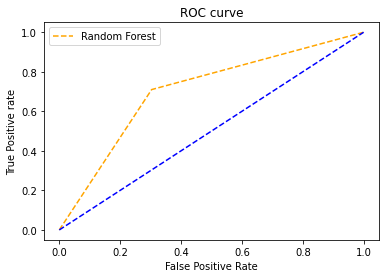

In [54]:
import matplotlib.pyplot as plt


# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Random Forest')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show();

# **ADABOOST CLASSIFIER**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(random_state=7)
ada.fit(x_train, y_train)
ada_pred = ada.predict(x_test)

In [ ]:
print(confusion_matrix(y_test,ada_pred))
print(accuracy_score(y_test,ada_pred))

[[13710  6715]
 [ 6787 13430]]
0.6677820973377294


In [ ]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(ada, x_train, y_train, cv=5)
print("Average cross validation score: {:.3f}".format(scores.mean()))
print("Test accuracy: {:.3f}".format(ada.score(x_test, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, ada_pred)))

Average cross validation score: 0.672
Test accuracy: 0.668
F1 score: 0.665


# **xgboost**

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
model = XGBClassifier(n_estimators=100,random_state=7)
model.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=7,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
model_pred=model.predict(x_test)

In [ ]:
print(confusion_matrix(y_test,model_pred))
print(accuracy_score(y_test,model_pred))

[[13907  6518]
 [ 6042 14175]]
0.690960090546725


Before tuning Accuracy 69.09%

**After tuning**

In [ ]:
param_grid = { 
    'base_score':[0.8,0.9,1.0,2.0,0.5],
    'learning_rate':[0.1,0.2,0.3,0.4],
    'gamma' :[1]
}

In [ ]:
xgboost_df = GridSearchCV(estimator=model,param_grid=param_grid,cv=8, verbose=1)

In [ ]:
xgboost_df.fit(x_train, y_train)

Fitting 8 folds for each of 20 candidates, totalling 160 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [08:59:47] /workspace/src/objective/./regression_loss.h:62: Check failed: base_score > 0.0f && base_score < 1.0f: base_score must be in (0,1) for logistic loss
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7efeb5455cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::obj::LogisticRegression::ProbToMargin(float)+0x82) [0x7efeb5655eb2]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::LearnerImpl::LazyInitModel()+0x48a) [0x7efeb54eb0ba]
  [bt] (3) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libx

GridSearchCV(cv=8, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=7, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'base_score': [0.8, 0.9, 1.0, 2.0, 0.5], 'gamma': [1],
                         'learning_rate': [0.1, 0.2, 0.3, 0.4]},
             pre_dispatch='2*n_j

In [ ]:
print(xgboost_df.best_estimator_)
print(xgboost_df.best_score_)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=1,
              learning_rate=0.4, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=7,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
0.7032413588476379


In [ ]:
model_pred2=xgboost_df.predict(x_test)

In [ ]:
print(confusion_matrix(y_test,model_pred2))
print(metrics.accuracy_score(y_test,model_pred2))

[[14138  6287]
 [ 5807 14410]]
0.7024260617095616


After Tuning Accuracy is 70.24%

**Plotting roc curve of random forest and xgboost**

In [ ]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, model_pred, pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, y_pred_rfc, pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

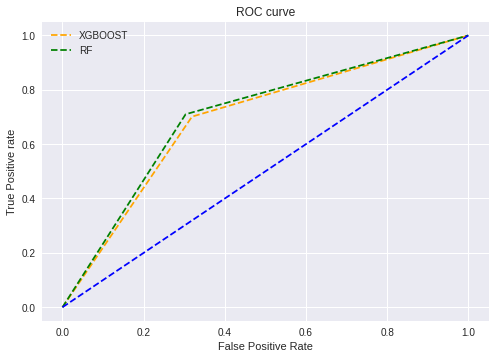

In [ ]:
import matplotlib.pyplot as plt


# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='XGBOOST')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='RF')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show();